# How do the different property types relate to price?

#### Busniess understanding: 
The objective of this programing is to find average price against various property type.

#### Data Understanding: 
Lisiting data set has 3000+ listing details with 92 columns of data. Lets explore average price against different property types


In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./listings.csv')
df.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


#### Prepare Data: 
Lets modify Some of the field to more usable inorder to calculate. Price field was converted from object to float to perform basic operation by removing $ symbol


In [26]:
#df[df.columns[1:]] = df[df.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
df['price']=df['price'].replace('[\$,]', '', regex=True).astype(float)

In [27]:
df['price']

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

##### Creating new data frame with only required fileds and dropping NaN values. Finding out mean price for each property type

In [61]:
new_df=df[['property_type','price']]
new_df=new_df.dropna()
new_df1= new_df.groupby('property_type')['price'].mean().sort_values(ascending=False)
#calendar_df_month_sum['average price'] = calendar_df_month_sum['price']/calendar_df_month_sum['available']

In [62]:
new_df1

property_type
Boat               282.375000
Condominium        151.109890
Loft               135.700000
House              132.351414
Townhouse          129.457627
Apartment          122.932670
Camper/RV          120.461538
Bungalow           115.615385
Bed & Breakfast    112.054054
Cabin              104.666667
Treehouse          101.000000
Yurt               100.000000
Chalet              98.500000
Other               94.681818
Tent                54.000000
Dorm                39.500000
Name: price, dtype: float64

#### Result: This data set has different type of properties that are listed in the Airbnb Seattle. Below depicts a view of the average price against different property types will helpful for future bookings.


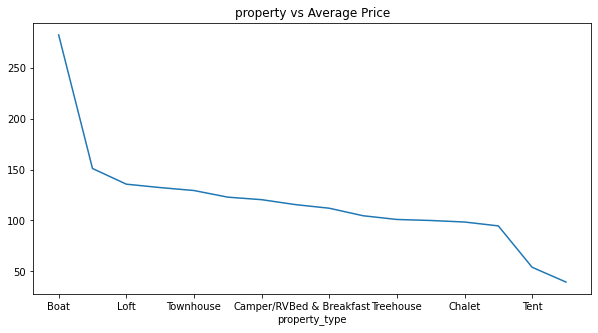

In [95]:
plt.figure(figsize=(10,5))
plt.title('property vs Average Price')
new_df1.plot(kind="line")
plt.show()

In [90]:
#df['review_scores_rating']
#df.groupby(pd.cut(df["review_scores_rating"], np.arange(0, 1.0+20, 40.0))).sum(df["price"]).any()


review_bin
(52.0, 60.0]     160.933333
(19.92, 28.0]    130.000000
(68.0, 76.0]     129.718750
(92.0, 100.0]    129.698545
(76.0, 84.0]     123.288235
(84.0, 92.0]     114.432836
(60.0, 68.0]     100.625000
(36.0, 44.0]      92.750000
(28.0, 36.0]            NaN
(44.0, 52.0]            NaN
Name: price, dtype: float64